In [1]:
import numpy as np
from collections import Counter
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tasks = ["ICDO1-sede1", "ICDO1-sede2", "ICDO1-sede12", "ICDO1-morfo1", "ICDO1-morfo2", "ICDO1-morfo12", "ICDO3-sede1", "ICDO3-sede2", "ICDO3-sede12", "ICDO3-morfo1", "ICDO3-morfo2", "ICDO3-morfo12"]
classes = {}
for t in tasks:
    classes[t] = []

with open("./corpusLSTM_ICDO1/sedeClean.txt", 'r') as f:
    for l in f.readlines():
        a,b = l.split()
        classes["ICDO1-sede1"].append(a)
        classes["ICDO1-sede2"].append(b)
        classes["ICDO1-sede12"].append("".join([a,b]))
        
with open("./corpusLSTM_ICDO1/morfoClean.txt", 'r') as f:
    for l in f.readlines():
        a,b = l.split()
        classes["ICDO1-morfo1"].append(a)
        classes["ICDO1-morfo2"].append(b)
        classes["ICDO1-morfo12"].append("".join([a,b]))

with open("./corpusLSTM_ICDO3/sedeClean.txt", 'r') as f:
    for l in f.readlines():
        a,b = l.split()
        classes["ICDO3-sede1"].append(a)
        classes["ICDO3-sede2"].append(b)
        classes["ICDO3-sede12"].append("".join([a,b]))
        
with open("./corpusLSTM_ICDO3/morfoClean.txt", 'r') as f:
    for l in f.readlines():
        a,b = l.split()
        classes["ICDO3-morfo1"].append(a)
        classes["ICDO3-morfo2"].append(b)
        classes["ICDO3-morfo12"].append("".join([a,b]))

In [3]:
counters = {}
for t in tasks:
     counters[t] = Counter(classes[t])

In [4]:
x = {}
y = {}
c = {}
p = {}
for t in tasks:
    x[t] = [0]
    y[t] = [0]
    c[t] = [0]
    for i,e in enumerate(counters[t].most_common()):
        #print(e)
        x[t].append(i+1)
        y[t].append(e[1])
        c[t].append(c[t][-1]+e[1])
    #c[t] = c[t][1:]
    p[t] = list(map(lambda x: x/c[t][-1], c[t]))

In [5]:
arr = counters['ICDO3-morfo2'].most_common()
arr
#len([a for a in arr if a[1]>=10])

[('3', 81555), ('2', 5937), ('1', 5397), ('0', 1170), ('6', 3)]

In [6]:
titles = {
    "ICDO1-sede1":"Site (ICD-O-1)",
    "ICDO1-sede2":"Site2 (ICD-O-1)",
    "ICDO1-sede12":"Full site (ICDO-O-1)",
    "ICDO1-morfo1":"Type (ICD-O-1)",
    "ICDO1-morfo2":"Behaviour (ICDO-O-1)",
    "ICDO1-morfo12":"Type + behaviour (ICD-O-1)",
    "ICDO3-sede1":"Site (ICD-O-3)",
    "ICDO3-sede2":"Site2 (ICD-O-3)",
    "ICDO3-sede12":"Full site (ICDO-O-3)",
    "ICDO3-morfo1":"Type (ICD-O-3)",
    "ICDO3-morfo2":"Behaviour (ICDO-O-3)",
    "ICDO3-morfo12":"Type + behaviour (ICD-O-3)"
}


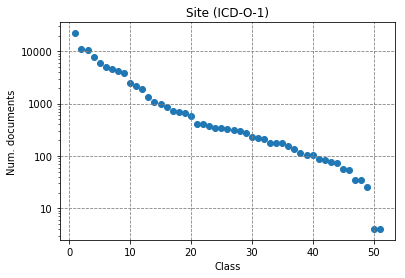

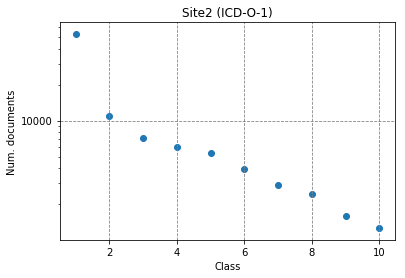

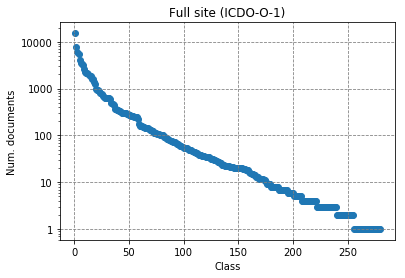

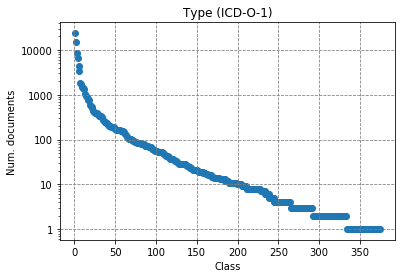

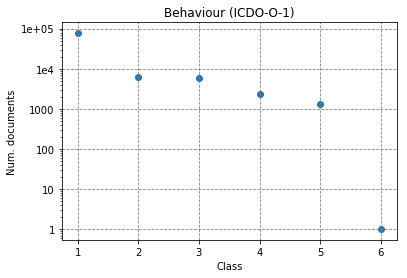

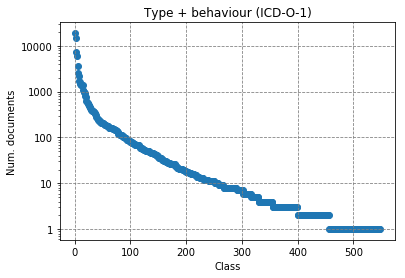

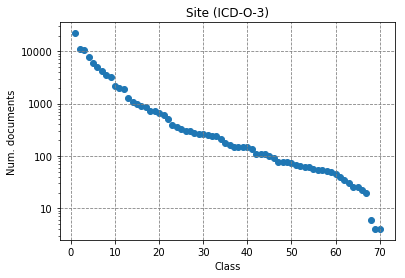

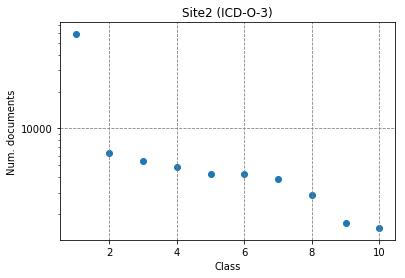

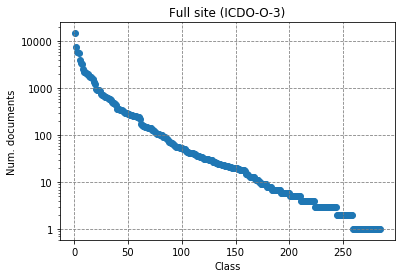

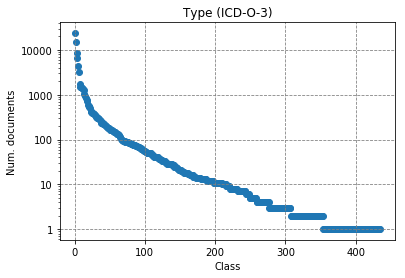

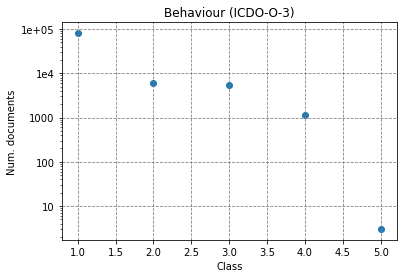

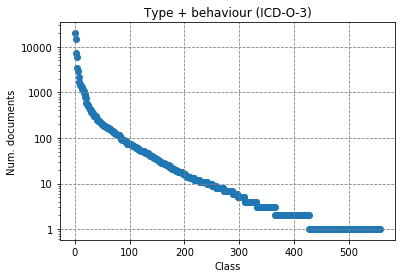

In [12]:
for t in tasks:
    fig = plt.figure()
    ax = fig.gca()
    ax.set_yscale('log')
    #ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))
    plt.title(titles[t])
    plt.scatter(x[t][1:],y[t][1:])
    plt.grid()
    plt.rc('grid', linestyle="--", color='gray')
    plt.xlabel("Class")
    plt.ylabel("Num. documents")
    plt.savefig("/tmp/figT-"+t+".pdf", bbox_inches='tight')
    plt.show()

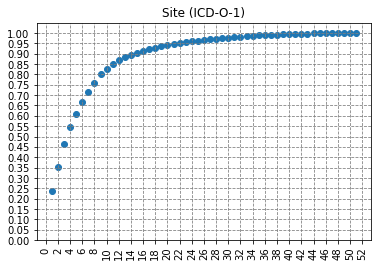

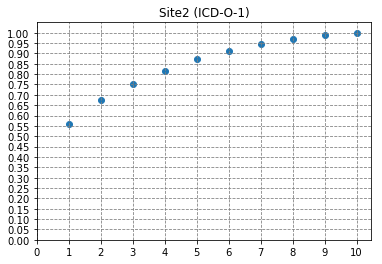

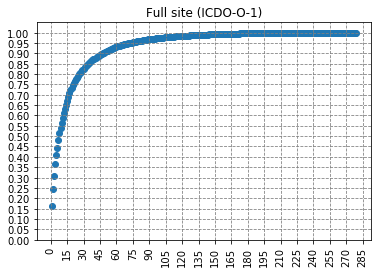

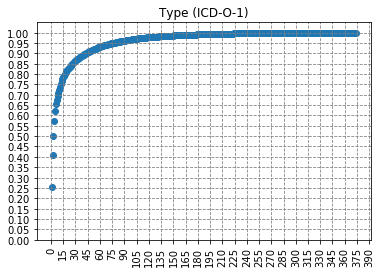

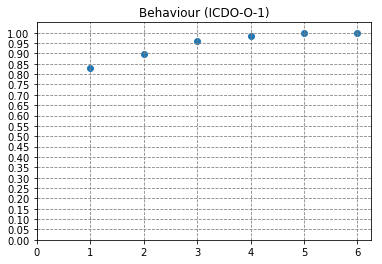

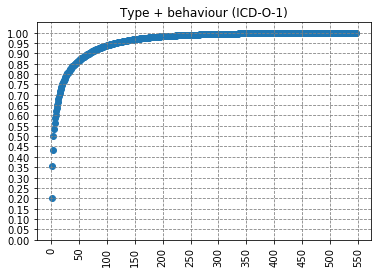

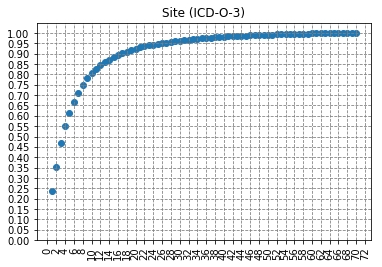

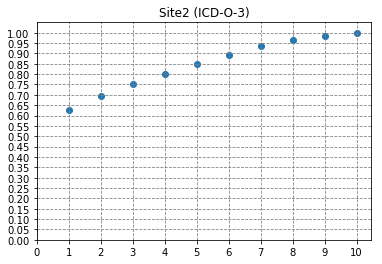

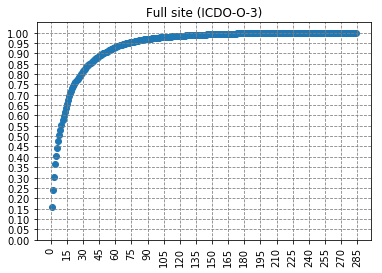

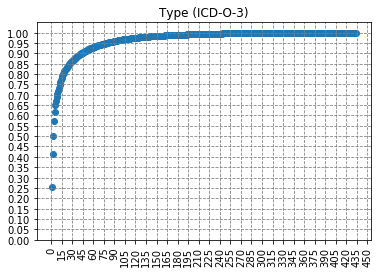

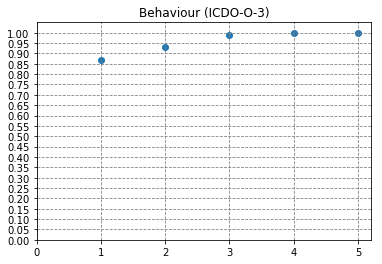

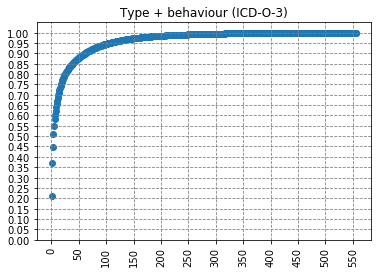

In [11]:
xticks = {
    "ICDO1-sede1":(2,'vertical'),
    "ICDO1-sede2":(1, 'horizontal'),
    "ICDO1-sede12":(15, 'vertical'),
    "ICDO1-morfo1":(15, 'vertical'),
    "ICDO1-morfo2":(1, 'horizontal'),
    "ICDO1-morfo12":(50, 'vertical'),
    "ICDO3-sede1":(2, 'vertical'),
    "ICDO3-sede2":(1, 'horizontal'),
    "ICDO3-sede12":(15, 'vertical'),
    "ICDO3-morfo1":(15, 'vertical'),
    "ICDO3-morfo2":(1, 'horizontal'),
    "ICDO3-morfo12":(50, 'vertical')
}
for t in tasks:
    fig = plt.figure()
    ax = fig.gca()
    plt.title(titles[t])
    plt.scatter(x[t][1:],p[t][1:])
    ax.set_yticks(np.arange(0,1.05,0.05))
    plt.xticks(np.arange(0,ax.get_xlim()[1], xticks[t][0]), rotation=xticks[t][1])
    plt.ylim([0.,1.05])
    plt.xlim(xmin=min(0, ax.get_xlim()[0]))
    plt.grid()
    plt.savefig("/tmp/fig-"+t+".pdf", bbox_inches='tight')
    plt.show()

In [10]:
#cutoff = 5350
cutoff = 10
t = "ICDO1-sede1"
print(c[t][-1])
print(c[t][cutoff])
print(c[t][-1]-c[t][cutoff])
print(p[t][-1]-p[t][cutoff])

94476
78065
16411
0.17370549134171642


In [11]:
print("site")
print(p["ICDO1-sede1"][15])
print(len(p["ICDO1-sede1"])-1)
print("full site")
print(p["ICDO1-sede12"][48])
print(len(p["ICDO1-sede12"])-1)
print("type")
print(p["ICDO1-morfo1"][43])
print(len(p["ICDO1-morfo1"])-1)
print("behaviour")
print(p["ICDO1-morfo2"][3])
print(len(p["ICDO1-morfo2"])-1)

site
0.9055950717642576
51
full site
0.9004720775646725
279
type
0.9005355857572294
374
behaviour
0.9613235107328846
6


In [12]:
for t in tasks:
    print("{} - {}".format(t, len(x[t])))

ICDO1-sede1 - 52
ICDO1-sede2 - 11
ICDO1-sede12 - 280
ICDO1-morfo1 - 375
ICDO1-morfo2 - 7
ICDO1-morfo12 - 548
ICDO3-sede1 - 71
ICDO3-sede2 - 11
ICDO3-sede12 - 285
ICDO3-morfo1 - 435
ICDO3-morfo2 - 6
ICDO3-morfo12 - 557


In [13]:
for e in counters["ICDO1-morfo2"].most_common():
    print(e)

('3', 78533)
('1', 6304)
('2', 5985)
('6', 2318)
('0', 1335)
('9', 1)


In [14]:
counters["ICDO3-morfo12"].most_common()[:50]

[('81403', 20034),
 ('80903', 14754),
 ('80703', 7353),
 ('85003', 6061),
 ('81401', 3487),
 ('80103', 2967),
 ('81303', 2196),
 ('81302', 1684),
 ('84803', 1514),
 ('83123', 1430),
 ('81203', 1390),
 ('83803', 1363),
 ('82613', 1340),
 ('87433', 1175),
 ('80003', 1108),
 ('80702', 1075),
 ('85203', 983),
 ('81443', 916),
 ('97323', 776),
 ('96803', 740),
 ('82603', 596),
 ('85002', 565),
 ('80413', 561),
 ('85223', 528),
 ('85503', 494),
 ('81301', 450),
 ('87203', 437),
 ('80812', 423),
 ('81703', 400),
 ('84903', 377),
 ('94403', 376),
 ('84413', 356),
 ('82113', 356),
 ('81453', 334),
 ('95913', 309),
 ('96903', 304),
 ('87202', 298),
 ('81402', 297),
 ('80772', 285),
 ('80463', 259),
 ('80011', 252),
 ('81202', 243),
 ('89313', 236),
 ('83403', 232),
 ('83103', 232),
 ('95903', 225),
 ('96703', 217),
 ('82013', 210),
 ('80102', 206),
 ('80763', 198)]

In [15]:
counters["ICDO3-sede1"].most_common()

[('44', 22309),
 ('18', 10894),
 ('50', 10789),
 ('61', 7632),
 ('67', 6020),
 ('34', 5031),
 ('16', 4281),
 ('20', 3475),
 ('42', 3196),
 ('54', 2174),
 ('64', 1990),
 ('53', 1898),
 ('56', 1257),
 ('32', 1057),
 ('73', 978),
 ('19', 918),
 ('25', 872),
 ('77', 737),
 ('71', 708),
 ('22', 648),
 ('49', 601),
 ('80', 515),
 ('26', 397),
 ('15', 362),
 ('24', 327),
 ('70', 299),
 ('62', 299),
 ('02', 278),
 ('17', 265),
 ('51', 259),
 ('21', 248),
 ('23', 240),
 ('06', 239),
 ('38', 213),
 ('75', 175),
 ('66', 162),
 ('09', 148),
 ('07', 148),
 ('65', 146),
 ('48', 146),
 ('00', 133),
 ('68', 109),
 ('30', 108),
 ('72', 107),
 ('11', 102),
 ('60', 93),
 ('40', 78),
 ('41', 76),
 ('69', 76),
 ('57', 74),
 ('05', 66),
 ('10', 63),
 ('08', 62),
 ('31', 61),
 ('04', 56),
 ('55', 55),
 ('01', 54),
 ('52', 52),
 ('74', 50),
 ('12', 45),
 ('13', 39),
 ('03', 34),
 ('37', 30),
 ('14', 26),
 ('76', 26),
 ('47', 22),
 ('63', 20),
 ('33', 6),
 ('58', 4),
 ('39', 4)]

In [16]:
counters["ICDO3-sede2"].most_common()

[('9', 58913),
 ('4', 6356),
 ('0', 5457),
 ('1', 4810),
 ('3', 4261),
 ('7', 4254),
 ('2', 3896),
 ('5', 2872),
 ('6', 1703),
 ('8', 1540)]